# Topics in Artificial Intelligence
# Assignment 1: Intriduction to Deep Learning


In Section 1 of the notebook, we have implemented a single-layer supervised neural network for you, so no coding is necessary for this section. Sections 2 and 3 are where your coding expertise is needed, and you'll also be expected to answer specific questions. Section 4 is crafted to familiarize you with PyTorch. Beyond that, its primary purpose is to equip you with essential debugging strategies for training neural networks.

# Single-layer neural network
This section provides simple implementation of the single-layer supervised neural network that has 4 inputs and 3 outputs. First, let's review the skeleton of a single linear layer neural network. The inputs of the network are the variables $x_1, x_2, x_3, x_4$, or the input vector $\mathbf{x}=[x_1, x_2, x_3, x_4]$, the outputs of the network are $\widehat{y}_1,\widehat{y}_2,\widehat{y}_3$, or the output vector $\widehat{\mathbf{y}}=[$$\widehat{y}$$_1,\widehat{y}_2,\widehat{y}_3]$:

<br>
<center>
<img src="./images/1_layer_net.png" width="450">
</center>
<br>

The given $j$-th output $\widehat{y}_j$ of this single linear layer + activation function is computed as follows:

$$\widehat{y}_j= \text{sigmoid}(w_{1j}x_1 + w_{2j}x_2 + w_{3j}x_3 + w_{4j}x_4 + b_j) = \text{sigmoid}\Big(\sum_{i=1}^{i=4}w_{ij}x_{i} + b_j\Big)$$

In matrix notation, this would be: 

\begin{equation}
\begin{bmatrix}
  \widehat{y}_{1} \\ 
  \widehat{y}_{2} \\
  \widehat{y}_{3} 
\end{bmatrix}^T=\mathbf{Sigmoid}\Bigg(
\begin{bmatrix}
  x_{1} \\
  x_{2} \\
  x_{3} \\
  x_{4}
\end{bmatrix}^T
\begin{bmatrix}
  w_{1,1} & w_{1,2} & w_{1,3}\\
  w_{2,1} & w_{3,2} & w_{2,3}\\
  w_{3,1} & w_{3,2} & w_{3,3}\\
  w_{4,1} & w_{4,2} & w_{4,3}
\end{bmatrix}
+
\begin{bmatrix}
  b_{1} \\
  b_{2} \\
  b_{3}
\end{bmatrix}^T\Bigg)
\end{equation}

or more compactly:

\begin{equation}
\widehat{\mathbf{y}}^T = \mathbf{Sigmoid}(\mathbf{x}^T \cdot \mathbf{W} + \mathbf{b}^T)
\end{equation}

The element-wise sigmoid function is: $\mathbf{Sigmoid}(\mathbf{x}) = 1 \;/\; (1 + exp(-\mathbf{x}))$, or alternatively: $\mathbf{Sigmoid}(\mathbf{x}) = exp(\mathbf{x})\;/\;(1 + exp(\mathbf{x}))$. Here the sigmoid is separated logically into an activation layer $\sigma(x)$ and a linear layer $\text{linear}(3,4)$ as illustrated in figure. 

Training these weights $\mathbf{W}$ and biases $\mathbf{b}$ requires having many training pairs $(\widehat{\mathbf{y}}^{(m)}, \mathbf{x}^{(m)})$. The inputs $\mathbf{x}$ can be the pixels of an image, indices of words, the entries in a database, and the outputs $\widehat{\mathbf{y}}$ can also be literally anything, including a number indicating a category, a set of numbers indicating the indices of words composing a sentence, an output image itself, etc.

## Forward-propagation

Computing the outputs $\widehat{\mathbf{y}}$ from the inputs $\mathbf{x}$ in this network composed of a single linear layer, and a sigmoid layer, is called forward-propagation. Below is the code that implements these two operations:

In [1]:
import numpy as np
import numpy.matlib

class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.001
        self.bias = np.matlib.randn((1, output_dim)) * 0.001
        
    # y = Wx + b
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias
    
    def getParameters(self):
        return [self.weight, self.bias]

# Let's test the composition of the two functions (forward-propagation in the neural network).
x1 = np.array([[1, 2, 2, 3]])
y_hat1 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x1))
print('x[1] = '+ str(x1))
print('y_hat[1] = ' + str(y_hat1) + '\n')

# Let's test the composition of the two functions (forward-propagation in the neural network).
x2 = np.array([[4, 5, 2, 1]])
y_hat2 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x2))
print('x[2] = '+ str(x2))
print('y_hat[2] = ' + str(y_hat2) + '\n')

# We can also compute both at once, which could be more efficient since it requires a single matrix multiplication.
x = np.concatenate((x1, x2), axis = 0)
y_hat = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x))
print('x = ' + str(x))
print('y_hat = ' + str(y_hat))

x[1] = [[1 2 2 3]]
y_hat[1] = [[0.50164291 0.50085796 0.49896665]]

x[2] = [[4 5 2 1]]
y_hat[2] = [[0.4997006  0.49798111 0.49853558]]

x = [[1 2 2 3]
 [4 5 2 1]]
y_hat = [[0.50197314 0.49928043 0.50017512]
 [0.50287704 0.50029541 0.49973329]]


## Loss functions.

After computing the output predictions $\widehat{\mathbf{y}}$ it is necessary to compare these against the true values of $\mathbf{y}$. Let's call these true, correct, or desired values $\mathbf{y}$. Typically, a simple loss or cost function is used to measure the degree by which the prediction $\widehat{\mathbf{y}}$ is wrong with respect to $\mathbf{y}$. A common loss function for regression is the sum of squared differences between the prediction and its true value. Assuming a prediction $\widehat{\mathbf{y}}^{(d)}$ for our training sample $\mathbf{x}^{(d)}$ with true value $\mathbf{y}^{(d)}$, then the loss can be computed as:

$$loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)}) = (\widehat{y}^{(d)}_1 - y^{(d)}_1)^2 + (\widehat{y}^{(d)}_2 - y^{(d)}_2)^2 + (\widehat{y}^{(d)}_3 - y^{(d)}_3)^2 = \sum_{j=1}^{j=3}(\widehat{y}^{(d)}_j - y^{(d)}_j)^2$$

The goal is to modify the parameters [$\mathbf{W}, \mathbf{b}$] in the Linear layer so that the value of $loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$ becomes as small as possible for all training samples in a set $D=\{(\mathbf{x}^{(d)},\mathbf{y}^{(d)})\}$. This would in turn ensure that predictions $\widehat{\mathbf{y}}$ are as similar as possible to the true values $\mathbf{y}$. To achieve this we need to minimize the following function:

$$\mathcal{L}(\mathbf{W}, \mathbf{b}) = \sum_{d=1}^{d=|D|} loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$$

The only two variables for our model in the function $\mathcal{L}(\mathbf{W}, \mathbf{b})$ are $\mathbf{W}$ and $\mathbf{b}$, this is because the training dataset $D$ is fixed. Finding the values of $\mathbf{W}$ and $\mathbf{b}$ that minimize the the loss, particularly for complex functions, is typically done using gradient based optimization, like Stochastic Gradient Descent (SGD). 

In [2]:
class nn_MSECriterion:  # MSE = mean squared error.
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))

# Let's test the loss function.
y_hat = np.array([[0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33]])
y_true = np.array([[0.25, 0.25, 0.25], [0.33, 0.33, 0.33], [0.77, 0.77, 0.77], [0.80, 0.80, 0.80]])

nn_MSECriterion().forward(y_hat, y_true)

1.6271000000000002


## Backward-propagation (Backpropagation)

Backpropagation is just applying the chain-rule in calculus to compute the derivative of a function which is the composition of many functions (this is essentially definition of the neural network). 

Below is the implementation of required derivative computations for our simple network. You are highly advised to derive the derivatives implemented here to make sure you understand how one arrives at them. 

In [3]:
# This is referred above as f(u).
class nn_MSECriterion:
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))
        
    def backward(self, predictions, labels):
        num_samples = labels.shape[0]
        return 2 * (predictions - labels)

# This is referred above as g(v).
class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    
    def backward(self, x, gradOutput):
        # It is usually a good idea to use gv from the forward pass and not recompute it again here.
        gv = 1 / (1 + np.exp(-x))  
        return np.multiply(np.multiply(gv, (1 - gv)), gradOutput)

# This is referred above as h(W, b)
class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.01
        self.bias = np.matlib.randn((1, output_dim)) * 0.01
        self.gradWeight = np.zeros_like(self.weight)
        self.gradBias = np.zeros_like(self.bias)
        
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias
    
    def backward(self, x, gradOutput):
        # dL/dw = dh/dw * dL/dv
        self.gradWeight = np.dot(x.T, gradOutput)
        # dL/db = dh/db * dL/dv
        self.gradBias = np.copy(gradOutput)
        # return dL/dx = dh/dx * dL/dv
        return np.dot(gradOutput, self.weight.T)
    
    def getParameters(self):
        params = [self.weight, self.bias]
        gradParams = [self.gradWeight, self.gradBias]
        return params, gradParams
    

# Let's test some dummy inputs for a full pass of forward and backward propagation.
x1 = np.array([[1, 2, 2, 3]])
y1 = np.array([[0.25, 0.25, 0.25]])

# Define the operations.
linear = nn_Linear(4, 3)  # h(W, b)
sigmoid = nn_Sigmoid()  # g(v)
loss = nn_MSECriterion()  # f(u)

# Forward-propagation.
lin = linear.forward(x1)
y_hat = sigmoid.forward(lin)
loss_val = loss.forward(y_hat, y1) # Loss function.

# Backward-propagation.
dy_hat = loss.backward(y_hat, y1)
dlin = sigmoid.backward(lin, dy_hat)
dx1 = linear.backward(x1, dlin)

print('\n num_samples = ' + str(y1.shape[0]))

# Show parameters of the linear layer.
print('\nW = ' + str(linear.weight))
print('B = ' + str(linear.bias))

# Show the intermediate outputs in the forward pass.
print('\nx1    = '+ str(x1))
print('lin   = ' + str(lin))
print('y_hat = ' + str(y_hat))

print('\nloss = ' + str(loss_val))

# Show the intermediate gradients with respect to inputs in the backward pass.
print('\ndy_hat = ' + str(dy_hat))
print('dlin   = ' + str(dlin))
print('dx1    = ' + str(dx1))

# Show the gradients with respect to parameters.
print('\ndW = ' + str(linear.gradWeight))
print('dB = ' + str(linear.gradBias))


 num_samples = 1

W = [[-0.00259187  0.00576559 -0.01691568]
 [-0.00235864 -0.01722103 -0.00807526]
 [-0.01375168 -0.00052001  0.0061629 ]
 [-0.00652321 -0.00668996  0.00678901]]
B = [[0.01008346 0.01186669 0.02606887]]

x1    = [[1 2 2 3]]
lin   = [[-0.04429869 -0.03791967  0.0256955 ]]
y_hat = [[0.48892714 0.49052122 0.50642352]]

loss = 0.1806896564573341

dy_hat = [[0.47785428 0.48104243 0.51284704]]
dlin   = [[0.11940498 0.12021739 0.1281906 ]]
dx1    = [[-0.00178479 -0.00338707 -0.00091451 -0.00071287]]

dW = [[0.11940498 0.12021739 0.1281906 ]
 [0.23880996 0.24043478 0.2563812 ]
 [0.23880996 0.24043478 0.2563812 ]
 [0.35821494 0.36065216 0.3845718 ]]
dB = [[0.11940498 0.12021739 0.1281906 ]]


## Gradient checking 

The gradients can also be computed with numerical approximation using the definition of derivatives. Let a single input pair $(\mathbf{x}, \mathbf{y})$ be the input, for each entry $w_{ij}$ in the weight matrix $\mathbf{W}$, the partial derivatives can be computed as follows:

$$\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}} = \frac{\mathcal{L}(\mathbf{W} + \mathbf{E}_{ij},b) - \mathcal{L}(\mathbf{W} - \mathbf{E}_{ij}, b)}{2\epsilon}, $$

where $\mathbf{E}_{ij}$ is a matrix that has $\epsilon$ in its $(i,j)$ entry and zeros everywhere else. Intuitively this gradient tells how would the value of the loss changes if we change a particular weight $w_{ij}$ by an $\epsilon$ amount. We can do the same to compute derivatives with respect to the bias parameters $b_i$. Below is the code that checks for a given input $(\mathbf{x}, \mathbf{y})$, the gradients for the matrix $\mathbf{W}$. 

In [4]:
# We will compute derivatives with respect to a single data pair (x,y)
x = np.array([[2.34, 3.8, 34.44, 5.33]])
y = np.array([[3.2, 4.2, 5.3]])

# Define the operations.
linear = nn_Linear(4, 3)
sigmoid = nn_Sigmoid()
criterion = nn_MSECriterion()

# Forward-propagation.
a0 = linear.forward(x)
a1 = sigmoid.forward(a0)
loss = criterion.forward(a1, y) # Loss function.

# Backward-propagation.
da1 = criterion.backward(a1, y)
da0 = sigmoid.backward(a0, da1)
dx = linear.backward(x, da0)

gradWeight = linear.gradWeight
gradBias = linear.gradBias

approxGradWeight = np.zeros_like(linear.weight)
approxGradBias = np.zeros_like(linear.bias)

# We will verify here that gradWeights are correct and leave it as an excercise
# to verify the gradBias.
epsilon = 0.0001
for i in range(0, linear.weight.shape[0]):
    for j in range(0, linear.weight.shape[1]):
        # Compute f(w)
        fw = criterion.forward(sigmoid.forward(linear.forward(x)), y) # Loss function.
        # Compute f(w + eps)
        shifted_weight = np.copy(linear.weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon
        shifted_linear = nn_Linear(4, 3)
        shifted_linear.bias = linear.bias
        shifted_linear.weight = shifted_weight
        fw_epsilon = criterion.forward(sigmoid.forward(shifted_linear.forward(x)), y) # Loss function
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight[i, j] = (fw_epsilon - fw) / epsilon

# These two outputs should be similar up to some precision.
print('gradWeight: ' + str(gradWeight))
print('\napproxGradWeight: ' + str(approxGradWeight))

gradWeight: [[ -3.18204234  -4.13570432  -5.48792946]
 [ -5.16741918  -6.71610103  -8.91202219]
 [-46.83313593 -60.8690841  -80.77106431]
 [ -7.24798532  -9.4202154  -12.50028376]]

approxGradWeight: [[ -3.18205498  -4.13559651  -5.48782662]
 [ -5.16745249  -6.71581669  -8.91175095]
 [-46.83582976 -60.84568199 -80.74871788]
 [ -7.2480508   -9.41965594 -12.49975004]]


## Stochastic Gradient Descent.

The code below creates a dummy dataset that will be used for training. The inputs are 1000 vectors of size 4, and the outputs are 1000 vectors of size 3. The focus here is on training, however, in a real task one would check accuracy of the model on test (unseen) data.

In [5]:
dataset_size = 1000

# Generate random inputs within some range.
x = np.random.uniform(0, 6, (dataset_size, 4))
# Generate outputs based on the inputs using some function.
y1 = np.sin(x.sum(axis = 1))
y2 = np.sin(x[:, 1] * 6)
y3 = np.sin(x[:, 1] + x[:, 3])
y = np.array([y1, y2, y3]).T

print(x.shape)
print(y.shape)

(1000, 4)
(1000, 3)


To learn the parameters efficiently we will implement the stochastic gradient descent loop that moves the weights according to the gradients. In each iteration we sample an $(\mathbf{x}, \mathbf{y})$ pair and compute the gradients of the parameters, then we update the parameters according to the following gradient descent rules:

$$w_{ij} = w_{ij} - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}}$$

$$b_i = b_i - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial b_i}$$

where $\lambda$ is the learning rate. 

In [6]:
learningRate = 0.1

model = {}
model['linear'] = nn_Linear(4, 3)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward.
        a0 = model['linear'].forward(xi)
        a1 = model['sigmoid'].forward(a0)
        loss += model['loss'].forward(a1, yi)

        # Backward.
        da1 = model['loss'].backward(a1, yi)
        da0 = model['sigmoid'].backward(a0, da1)
        model['linear'].backward(xi, da0)

        model['linear'].weight = model['linear'].weight - learningRate * model['linear'].gradWeight
        model['linear'].bias = model['linear'].bias - learningRate * model['linear'].gradBias
    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.49424736
epoch[10] = 1.44160854
epoch[20] = 1.43166486
epoch[30] = 1.42731664
epoch[40] = 1.42535174
epoch[50] = 1.42397631
epoch[60] = 1.42288143
epoch[70] = 1.42151290
epoch[80] = 1.42018549
epoch[90] = 1.41912153
epoch[100] = 1.41831402
epoch[110] = 1.41769209
epoch[120] = 1.41719796
epoch[130] = 1.41679448
epoch[140] = 1.41645780
epoch[150] = 1.41617191
epoch[160] = 1.41592565
epoch[170] = 1.41571085
epoch[180] = 1.41552134
epoch[190] = 1.41535235
epoch[200] = 1.41520006
epoch[210] = 1.41506140
epoch[220] = 1.41493387
epoch[230] = 1.41481537
epoch[240] = 1.41470418
epoch[250] = 1.41459890
epoch[260] = 1.41449839
epoch[270] = 1.41440178
epoch[280] = 1.41430842
epoch[290] = 1.41421791
epoch[300] = 1.41413006
epoch[310] = 1.41404482
epoch[320] = 1.41396229
epoch[330] = 1.41388264
epoch[340] = 1.41380609
epoch[350] = 1.41373284
epoch[360] = 1.41366303
epoch[370] = 1.41359677
epoch[380] = 1.41353410
epoch[390] = 1.41347500


# Two-layer neural network with 1-hidden layer.
In the previous section, we constructed a single-layer neural network that accepted input vectors of size 4 and produced output vectors of size 3. In this section, your challenge is to adapt the code to train a two-layer network, which includes one hidden layer with a size determined by hidden_state_size. Please note that hidden_state_size is a variable parameter that you should be able to adjust.

<br>
<center>
<img src="images/2_layer_net.png" width="450">
</center>
<br>


## Implementing the network and SGD learning.
Please modify the code of Section "Stochastic Gradient Descent" to implement a two-layer network and the SGD training procedure for it. 


In [8]:
hidden_state_size = 5;

# Your code goes here.

learningRate = 0.1

model = {}
model['linear_0'] = nn_Linear(4, hidden_state_size)
model['sigmoid'] = nn_Sigmoid()
model['linear_1'] = nn_Linear(hidden_state_size,3)
model['sigmoid'] = nn_Sigmoid()     # this line is just to make the structure beautiful, we donnt need it indeed.
model['loss'] = nn_MSECriterion()

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward.
        a0 = model['linear_0'].forward(xi)
        a1 = model['sigmoid'].forward(a0)
        a2 = model['linear_1'].forward(a1)
        a3 = model['sigmoid'].forward(a2)
        loss += model['loss'].forward(a3, yi)

        # Backward.
        da3 = model['loss'].backward(a3, yi)
        da2 = model['sigmoid'].backward(a2, da3)
        da1 = model['linear_1'].backward(a1, da2)
        da0 = model['sigmoid'].backward(a0, da1)
        model['linear_0'].backward(xi, da0)

        model['linear_0'].weight = model['linear_0'].weight - learningRate * model['linear_0'].gradWeight
        model['linear_0'].bias = model['linear_0'].bias - learningRate * model['linear_0'].gradBias

        model['linear_1'].weight = model['linear_1'].weight - learningRate * model['linear_1'].gradWeight
        model['linear_1'].bias = model['linear_1'].bias - learningRate * model['linear_1'].gradBias
    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.48349066
epoch[10] = 1.45328622
epoch[20] = 1.42519041
epoch[30] = 1.41044172
epoch[40] = 1.39671816
epoch[50] = 1.38620164
epoch[60] = 1.38182515
epoch[70] = 1.37980185
epoch[80] = 1.37855256
epoch[90] = 1.37750026
epoch[100] = 1.37614855
epoch[110] = 1.37363386
epoch[120] = 1.36699773
epoch[130] = 1.35215048
epoch[140] = 1.33429311
epoch[150] = 1.31932933
epoch[160] = 1.31333176
epoch[170] = 1.30821926
epoch[180] = 1.29132572
epoch[190] = 1.28519881
epoch[200] = 1.28294214
epoch[210] = 1.28151212
epoch[220] = 1.28057563
epoch[230] = 1.27973964
epoch[240] = 1.27913389
epoch[250] = 1.27879001
epoch[260] = 1.27848599
epoch[270] = 1.27823395
epoch[280] = 1.27829554
epoch[290] = 1.27893646
epoch[300] = 1.27761814
epoch[310] = 1.27817683
epoch[320] = 1.27800610
epoch[330] = 1.27796829
epoch[340] = 1.27750255
epoch[350] = 1.27903101
epoch[360] = 1.27865482
epoch[370] = 1.27870223
epoch[380] = 1.27758429
epoch[390] = 1.27821914


## Gradient checking.
Check the gradients of the above network for both linear layer parameters $W_1$ and $W_2$ using some sample input pair ($\mathbf{x}$, $\mathbf{y}$). You will likely want to look and model this after Section "Gradient checking" above.

In [9]:
# Your code goes here.

hidden_state_size = 5;
x = np.array([[2.34, 3.8, 34.44, 5.33]])
y = np.array([[3.2, 4.2, 5.3]])
xi = x
yi = y


model = {}
model['linear_0'] = nn_Linear(4, hidden_state_size)
model['sigmoid'] = nn_Sigmoid()
model['linear_1'] = nn_Linear(hidden_state_size,3)
model['sigmoid'] = nn_Sigmoid()     # this line is just to make the structure beautiful, we donnt need it indeed.
model['loss'] = nn_MSECriterion()

# Forward.
a0 = model['linear_0'].forward(xi)
a1 = model['sigmoid'].forward(a0)
a2 = model['linear_1'].forward(a1)
a3 = model['sigmoid'].forward(a2)
loss = model['loss'].forward(a3, yi)

# Backward.
da3 = model['loss'].backward(a3, yi)
da2 = model['sigmoid'].backward(a2, da3)
da1 = model['linear_1'].backward(a1, da2)
da0 = model['sigmoid'].backward(a0, da1)
model['linear_0'].backward(xi, da0)

linear_0_weight = model['linear_0'].gradWeight
linear_0_bias = model['linear_0'].gradBias

linear_1_weight = model['linear_1'].gradWeight
linear_1_bias = model['linear_1'].gradBias


epsilon = 0.0001


approxGradWeight_0 = np.zeros_like(model['linear_0'].weight)
approxGradWeight_1 = np.zeros_like(model['linear_1'].weight)
# Forward.

for i in range(0, model['linear_0'].weight.shape[0]):
    for j in range(0, model['linear_0'].weight.shape[1]):

        shifted_weight_0 = np.copy(model['linear_0'].weight)
        shifted_weight_0[i,j] += epsilon
        shifted_linear_0 = nn_Linear(4, hidden_state_size)
        shifted_linear_0.bias = model['linear_0'].bias
        shifted_linear_0.weight = shifted_weight_0

        A0 = shifted_linear_0.forward(xi)
        A1 = model['sigmoid'].forward(A0)
        A2 = model['linear_1'].forward(A1)
        A3 = model['sigmoid'].forward(A2)
        Loss = model['loss'].forward(A3, yi)

        approxGradWeight_0[i, j] = (Loss - loss) / epsilon

for i in range(0, model['linear_1'].weight.shape[0]):
    for j in range(0, model['linear_1'].weight.shape[1]):

        shifted_weight_1 = np.copy(model['linear_1'].weight)
        shifted_weight_1[i,j] += epsilon
        shifted_linear_1 = nn_Linear(hidden_state_size,3)
        shifted_linear_1.bias = model['linear_1'].bias
        shifted_linear_1.weight = shifted_weight_1

        A0 = model['linear_0'].forward(xi)
        A1 = model['sigmoid'].forward(A0)
        A2 = shifted_linear_1.forward(A1)
        A3 = model['sigmoid'].forward(A2)
        Loss = model['loss'].forward(A3, yi)

        approxGradWeight_1[i, j] = (Loss - loss) / epsilon

print('gradWeight_0: ' + str(linear_0_weight))
print('\napproxGradWeight_0: ' + str(approxGradWeight_0))
print('\nDiff between approx and grad 0: ' + str(approxGradWeight_0 - linear_0_weight))

print('\ngradWeight_1: ' + str(linear_1_weight))
print('\napproxGradWeight_1: ' + str(approxGradWeight_1))
print('\nDiff between approx and grad 1: ' + str(approxGradWeight_1 - linear_1_weight))

gradWeight_0: [[ 2.74093843e-02 -1.60157857e-02 -3.29536897e-02  2.03410580e-04
  -4.35493054e-02]
 [ 4.45109659e-02 -2.60085409e-02 -5.35145389e-02  3.30324873e-04
  -7.07210942e-02]
 [ 4.03409912e-01 -2.35719513e-01 -4.85010715e-01  2.99378648e-03
  -6.40956444e-01]
 [ 6.24324864e-02 -3.64804008e-02 -7.50611821e-02  4.63324099e-04
  -9.91956401e-02]]

approxGradWeight_0: [[ 2.74102964e-02 -1.60156080e-02 -3.29537375e-02  2.03414032e-04
  -4.35488734e-02]
 [ 4.45133713e-02 -2.60080721e-02 -5.35146647e-02  3.30334160e-04
  -7.07199543e-02]
 [ 4.03607233e-01 -2.35680795e-01 -4.85020618e-01  2.99455237e-03
  -6.40862255e-01]
 [ 6.24372186e-02 -3.64794781e-02 -7.50614291e-02  4.63342431e-04
  -9.91933967e-02]]

Diff between approx and grad 0: [[ 9.12132970e-07  1.77760319e-07 -4.78013666e-08  3.45236762e-09
   4.32022019e-07]
 [ 2.40543662e-06  4.68858168e-07 -1.25845889e-07  9.28665594e-09
   1.13990317e-06]
 [ 1.97320623e-04  3.87180509e-05 -9.90257777e-06  7.65891047e-07
   9.41883776e

## Activation functions.

As was covered in class, there are other activation functions that can be used instead of sigmoid. Implement below the forward and backward operation for two popular activation functions.

$$\text{ReLU}(\mathbf{x}) = \text{max}(0, \mathbf{x})$$

$$\text{Tanh($\mathbf{x}$)} = \text{tanh}(\mathbf{x}) = \frac{e^{\mathbf{x}} - e^{-\mathbf{x}}}{e^{\mathbf{x}} + e^{-\mathbf{x}}}$$

Note, that in the above activations are applied element-wise on the input vector $\mathbf{x}$.

In [10]:
# Rectified linear unit
class nn_ReLU:
    def forward(self, x):
        output = np.maximum(0,x)
        return output
    
    def backward(self, x, gradOutput):
        dx = np.array(gradOutput,copy=True)
        dx[x<=0] = 0
        return dx
        # Backward pass
        
# Hyperbolic tangent.
class nn_Tanh:
    def forward(self, x):
        return np.tanh(x)
        # Forward pass.
    
    def backward(self, x, gradOutput):
        return gradOutput * (1 - np.power(x,2))
        # Backward pass


## Loss functions.

As discussed in class, there are other loss functions that can be used instead of a mean squared error. Implement the forward and backward operations for the following very common loss function where $\widehat{\mathbf{y}}$ is a vector of predicted values, and $\mathbf{y}$ is the vector with ground-truth labels. Assume both vectors are of size $n$. 

$$\text{BinaryCrossEntropy}(\mathbf{y}, \widehat{\mathbf{y}}) = - \frac{1}{n}\sum_{i=1}^{i=n} [y_i\text{log}(\widehat{y}_i) + (1 - y_i)\text{log}(1 - \widehat{y}_i)]$$,

The binary cross entropy loss assumes that the vector $\mathbf{y}$ only has values that are either 0 and 1, and the prediction vector $\widehat{\mathbf{y}}$ contains values between 0 and 1 (e.g. the output of a $\text{sigmoid}$ layer).

In [11]:
# Binary cross entropy criterion. Useful for classification as opposed to regression.
class nn_BCECriterion:
    def forward(self, predictions, labels):
        # Forward pass.
        m = predictions.shape[0]
        loss = -(1/m) * np.sum(labels * np.log(predictions) + (1 - labels) * np.log(1 - predictions))
        return loss
    def backward(self, predictions, labels):
        m = predictions.shape[0]
        grad = (1/m) * (-(labels / predictions) + (1 - labels) / (1 - predictions))
        return grad
        # Backward pass.

<b>Optional</b>: Most deep learning libraries support batches, meaning you can forward, and backward a set of inputs. So far the code supports batches in the forward pass. However, the backward pass does not support batches. Modify the code in backward function of the nn_Linear class to support batches. Then test the implementation by training the network in Section 2.1 using a batch size of 32. <span style="color:#666">(Keep in mind that the gradWeight and gradBias vectors should accumulate the gradients of each sample in the batch. This is because the gradient of the loss with respect to the batch is the sum of the gradients with respect to each sample in the batch. This means that for a batch of size 32, the sum will be over the 32 samples).</span>

# Behaviour of neural networks.

Prior to this section, all experiments were done in a dummy dataset where it is difficult to see how neural networks behave on more realistic data. In this section the goal is to get a feel for how newural networks behave and what effect hidden statest may play. Below is the code that generates and visualizes a classification dataset of 400 samples. 

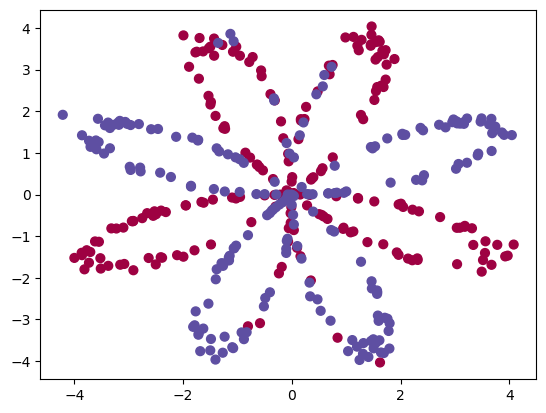

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.datasets
dataset_size = 400
def load_planar_dataset():
    np.random.seed(1)
    m = 400                # number of examples
    N = int(m/2)           # number of points per class
    D = 2                  # dimensionality
    X = np.zeros((m,D))    # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4                  # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2                    # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

# Load the data
X, Y = load_planar_dataset()

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

## Two-layer neural network with 1-hidden layer of size = 1.

Reimplement the network from Section "Implementing the network and SGD learning" here, train it and then display the results. 

epoch[0] = 0.24320365
epoch[10] = 0.24839155
epoch[20] = 0.24840609
epoch[30] = 0.24836885
epoch[40] = 0.24816505
epoch[50] = 0.24730817
epoch[60] = 0.24543288
epoch[70] = 0.24310437
epoch[80] = 0.23972534
epoch[90] = 0.23608457
epoch[100] = 0.23332022
epoch[110] = 0.23148968
epoch[120] = 0.23028013
epoch[130] = 0.22943413
epoch[140] = 0.22880130
epoch[150] = 0.22830072
epoch[160] = 0.22788845
epoch[170] = 0.22753928
epoch[180] = 0.22723764
epoch[190] = 0.22697323
epoch[200] = 0.22673875
epoch[210] = 0.22652884
epoch[220] = 0.22633938
epoch[230] = 0.22616718
epoch[240] = 0.22600967
epoch[250] = 0.22586480
epoch[260] = 0.22573089
epoch[270] = 0.22560654
epoch[280] = 0.22549060
epoch[290] = 0.22538210


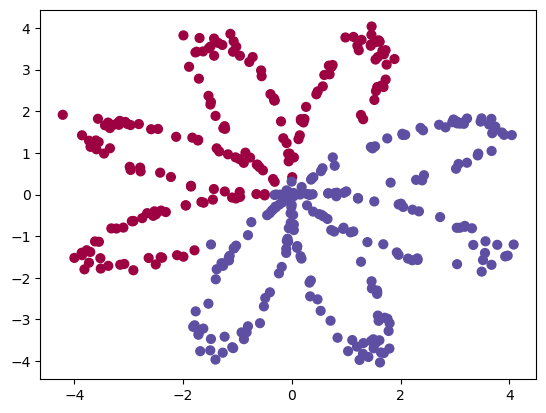

In [8]:
# Build a two-layer neural network (so one hidden layer) with sigmoid activations 
# and MSE loss. The hidden_state_dimensionality should be set to 1 using the variable
# below.
hidden_state_size = 1; 
X, Y = load_planar_dataset()
# Define the 2-layer network here (fill in yout code)

model = {}
model['linear_0'] = nn_Linear(2, hidden_state_size)
model['sigmoid'] = nn_Sigmoid()
model['linear_1'] = nn_Linear(hidden_state_size,1)
model['sigmoid'] = nn_Sigmoid()     # this line is just to make the structure beautiful, we donnt need it indeed.
model['loss'] = nn_MSECriterion()
# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300
X = X.T
Y = Y.T
for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):
        xi = X[i].reshape(1,-1)
        yi = Y[i]        
        # Forward pass (fill in your code)
        a0 = model['linear_0'].forward(xi)
        a1 = model['sigmoid'].forward(a0)
        a2 = model['linear_1'].forward(a1)
        a3 = model['sigmoid'].forward(a2)
        loss += model['loss'].forward(a3, yi)
        # Backward pass (fill in your code)
        da3 = model['loss'].backward(a3, yi)
        da2 = model['sigmoid'].backward(a2, da3)
        da1 = model['linear_1'].backward(a1, da2)
        da0 = model['sigmoid'].backward(a0, da1)
        model['linear_0'].backward(xi, da0)        
        # Update gradients (fill in your code)
        model['linear_0'].weight = model['linear_0'].weight - learningRate * model['linear_0'].gradWeight
        model['linear_0'].bias = model['linear_0'].bias - learningRate * model['linear_0'].gradBias

        model['linear_1'].weight = model['linear_1'].weight - learningRate * model['linear_1'].gradWeight
        model['linear_1'].bias = model['linear_1'].bias - learningRate * model['linear_1'].gradBias
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))


%matplotlib inline

classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):        
    # Forward pass (fill in your code)
    xi = X[i]
    yi = Y[i] 
    a0 = model['linear_0'].forward(xi)
    a1 = model['sigmoid'].forward(a0)
    a2 = model['linear_1'].forward(a1)
    a3 = model['sigmoid'].forward(a2)       
        
    classEstimate[i,0] = (a3 > 0.5)
X = X.T
Y = Y.T
plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## Two-layer neural network with 1-hidden layer of size = 5.

Redo the experiment with the hidden layer of size 5 and visualize the result. <b>Describe in a separate cell of the notebook what is different between the two runs </b>. What behaviout did network with largerr hidden state exhibit that the one with smaller one did not? Why? 

epoch[0] = 0.23116567
epoch[10] = 0.24457082
epoch[20] = 0.24432491
epoch[30] = 0.24304065
epoch[40] = 0.23987890
epoch[50] = 0.23744215
epoch[60] = 0.23644906
epoch[70] = 0.23540473
epoch[80] = 0.23309648
epoch[90] = 0.22892910
epoch[100] = 0.22399718
epoch[110] = 0.21987117
epoch[120] = 0.21698844
epoch[130] = 0.21496608
epoch[140] = 0.21319791
epoch[150] = 0.21070401
epoch[160] = 0.20498188
epoch[170] = 0.19129950
epoch[180] = 0.17276872
epoch[190] = 0.15734183
epoch[200] = 0.14617942
epoch[210] = 0.13819914
epoch[220] = 0.13237376
epoch[230] = 0.12800505
epoch[240] = 0.12463910
epoch[250] = 0.12197938
epoch[260] = 0.11982880
epoch[270] = 0.11805364
epoch[280] = 0.11656124
epoch[290] = 0.11528606


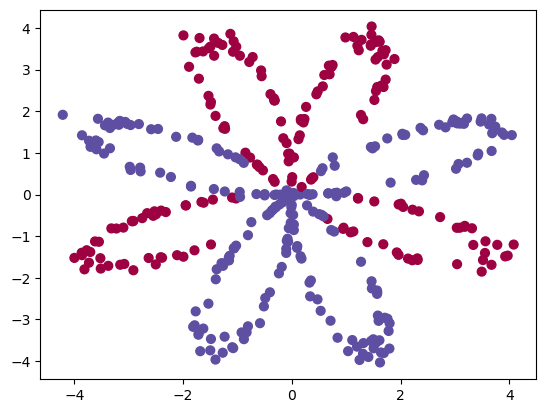

In [9]:
hidden_state_size = 5; 

# Rest should be taken from above 
# Build a two-layer neural network (so one hidden layer) with sigmoid activations 
# and MSE loss. The hidden_state_dimensionality should be set to 1 using the variable
# below.

X, Y = load_planar_dataset()
# Define the 2-layer network here (fill in yout code)

model = {}
model['linear_0'] = nn_Linear(2, hidden_state_size)
model['sigmoid'] = nn_Sigmoid()
model['linear_1'] = nn_Linear(hidden_state_size,1)
model['sigmoid'] = nn_Sigmoid()     # this line is just to make the structure beautiful, we donnt need it indeed.
model['loss'] = nn_MSECriterion()
# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300
X = X.T
Y = Y.T
for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):
        xi = X[i].reshape(1,-1)
        yi = Y[i]        
        # Forward pass (fill in your code)
        a0 = model['linear_0'].forward(xi)
        a1 = model['sigmoid'].forward(a0)
        a2 = model['linear_1'].forward(a1)
        a3 = model['sigmoid'].forward(a2)
        loss += model['loss'].forward(a3, yi)
        # Backward pass (fill in your code)
        da3 = model['loss'].backward(a3, yi)
        da2 = model['sigmoid'].backward(a2, da3)
        da1 = model['linear_1'].backward(a1, da2)
        da0 = model['sigmoid'].backward(a0, da1)
        model['linear_0'].backward(xi, da0)        
        # Update gradients (fill in your code)
        model['linear_0'].weight = model['linear_0'].weight - learningRate * model['linear_0'].gradWeight
        model['linear_0'].bias = model['linear_0'].bias - learningRate * model['linear_0'].gradBias

        model['linear_1'].weight = model['linear_1'].weight - learningRate * model['linear_1'].gradWeight
        model['linear_1'].bias = model['linear_1'].bias - learningRate * model['linear_1'].gradBias
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))


%matplotlib inline

classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):        
    # Forward pass (fill in your code)
    xi = X[i]
    yi = Y[i] 
    a0 = model['linear_0'].forward(xi)
    a1 = model['sigmoid'].forward(a0)
    a2 = model['linear_1'].forward(a1)
    a3 = model['sigmoid'].forward(a2)       
        
    classEstimate[i,0] = (a3 > 0.5)
X = X.T
Y = Y.T
plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

# PyTorch and Debugging.

In this section the goal is to experiment with PyTorch and also with the typical debugging techniques used in deep learning and simple debugging tools available to you. In this part, you are given a re-implementation of the dataset and neural network you worked with in the previous section of the assignment. However, this re-implementation is based on the data structures and functions available in PyTorch. Note that both the data loader and the model code contain a few strategically placed **bugs**. Your goal in this part of the assignment is to use the provided strategies to discover those bugs. 

## Dataloader 

First thing that typically happens in PyTorch code is definition of a dataloader. A dataloader is used to load and organize the data for training, validation and testing. We are providing a slightly buggy implementation below. 

In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.utils.data as data
import torch.nn as nn
import random

class PlanarDataset(data.Dataset):
    def __init__(self,num_examples=400):
        ## Function to initialize the dataset class
        np.random.seed(1)
        m = 400                  # number of examples
        N = int(m/2)             # number of points per class
        D = 2                    # dimensionality
        a = 4                    # maximum ray of the flower

        self.X = np.zeros((m,D)) # data matrix where each row is a single example
        self.Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)

        for j in range(2):
            ix = range(N*j,N*(j+1))
            t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
            r = a*np.sin(4*t) + np.random.randn(N)*0.2                    # radius
            self.X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
            self.Y[ix] = j #random.randint(0, 1) 

    def __getitem__(self, index):
        ## Return a data point given an index. Convert numpy array to Pytorch Tensor.
        return torch.from_numpy(self.X[index,:],).type(torch.FloatTensor), torch.from_numpy(self.Y[index,:]).type(torch.FloatTensor)


    def __len__(self):
        ## Return the length of the dataset
        return self.X.shape[0]
    
    def get_all_data(self):
      ## Return all the data. Not something you would do for large datasets. Just used here for convenience of visualization
      return self.X.T, self.Y.T


## **Debugging Strategy 1**: Always visualize the data.

Please use the code below to visualize the data from the dataloader above. Please run this cell multiple times. You should see that the visualization changes. This means that something non-determenistic is happening in the datalader. You should be able spot what is happening from visualization. Once you do, go back and fix the data loader above. 

**Hint:** only one line needs changing in the dataloader. 

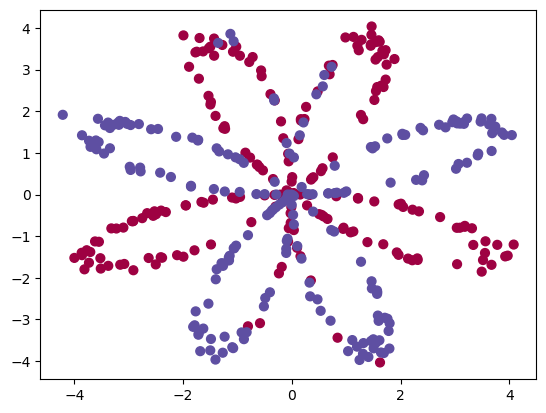

In [16]:
# Load the data
planarDataObj = PlanarDataset()
X, Y = planarDataObj.get_all_data()

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

## Model definition and optimization

Functions bellow define a version of neural network with a single hidden layer, from Section "Behaviour of neural networks", using PyTorch functions. Note that similarly to above this code is not bug-free.

epoch[0] = 0.00440149
epoch[10] = 0.00421216
epoch[20] = 0.00406818
epoch[30] = 0.00408892
epoch[40] = 0.00376832
epoch[50] = 0.00373844
epoch[60] = 0.00337932
epoch[70] = 0.00297234
epoch[80] = 0.00253372
epoch[90] = 0.00232907
epoch[100] = 0.00225708
epoch[110] = 0.00214145
epoch[120] = 0.00207804
epoch[130] = 0.00197547
epoch[140] = 0.00189858
epoch[150] = 0.00188141
epoch[160] = 0.00189287
epoch[170] = 0.00209290
epoch[180] = 0.00183046
epoch[190] = 0.00181163
epoch[200] = 0.00187186
epoch[210] = 0.00181073
epoch[220] = 0.00189719
epoch[230] = 0.00170640
epoch[240] = 0.00197317
epoch[250] = 0.00170652
epoch[260] = 0.00169704
epoch[270] = 0.00194868
epoch[280] = 0.00177331
epoch[290] = 0.00188972


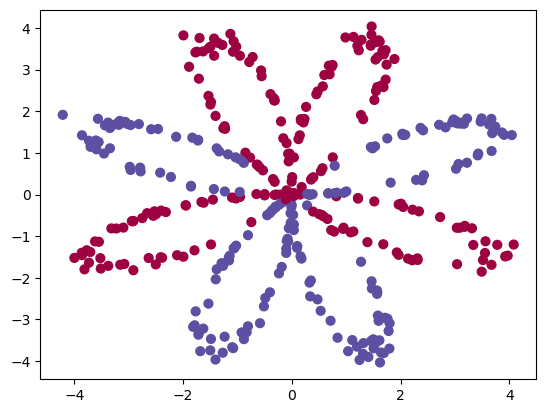

In [17]:
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
"""
the bug has been fixed here
# for param in linear1.parameters():  
#     param.requires_grad = False
"""
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## **Debugging Strategy 2:** Remove all sources of randomness from the code

Note that while it is clear that the code above isn't performing as expected (loss does not go down) with every run of the cell you should see a slightly different result and order of loss values. This is because of inherent randomness in the code. While the randomness is good when learning (avoids biases) it is bad when debugging for obvious reasons. Modify the code above to make sure it executes the same way every time you run it. For this you will want to make use of the function below and also fix the randomness in dataloader. 

**Note:** Use the function below as well as look at ensuring that the order of data in the dataloader remains fixed. You may want to consult PyTorch guidelines on reproducibility https://pytorch.org/docs/stable/notes/randomness.html.

epoch[0] = 0.00445044
epoch[10] = 0.00425069
epoch[20] = 0.00410612
epoch[30] = 0.00395750
epoch[40] = 0.00380322
epoch[50] = 0.00381829
epoch[60] = 0.00362503
epoch[70] = 0.00318312
epoch[80] = 0.00284260
epoch[90] = 0.00262447
epoch[100] = 0.00233605
epoch[110] = 0.00219482
epoch[120] = 0.00210903
epoch[130] = 0.00198819
epoch[140] = 0.00195605
epoch[150] = 0.00207218
epoch[160] = 0.00193985
epoch[170] = 0.00202940
epoch[180] = 0.00194622
epoch[190] = 0.00190108
epoch[200] = 0.00176547
epoch[210] = 0.00188485
epoch[220] = 0.00177002
epoch[230] = 0.00193592
epoch[240] = 0.00176917
epoch[250] = 0.00174821
epoch[260] = 0.00184171
epoch[270] = 0.00172306
epoch[280] = 0.00195291
epoch[290] = 0.00173516


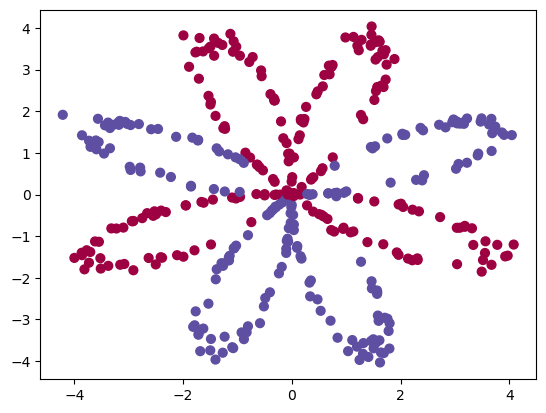

In [18]:
def fix_seeds():
    random_seed = 1      # or coluld be any of your favorite number 
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)

fix_seeds()
# Copy the code from Section Model definition and optimization and modify accordingly
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
# for param in linear1.parameters():  
#     param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## **Debugging Strategy 3:** Train with minimal amount of data 

It may still be difficult to identify what is wrong based on results in Section "Remove all sources of randomness from the code". A really good strategy, especially for model debugging, is to try optimizing with a single example/sample. Modify the code from Section "Remove all sources of randomness from the code" in order to do this. Once you do and run it, it should be obvious that there is a bug in your code and what that bug might be. 

In [11]:
# Copy the code from Section "Remove all sources of randomness from the code" and modify to run with batch size of 1 and only one / same batch used in each epoch.
def fix_seeds():
    random_seed = 1      # or coluld be any of your favorite number 
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)

fix_seeds()
# Copy the code from Section Model definition and optimization and modify accordingly
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
# for param in linear1.parameters():  
#     param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 1   #64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    iter, data in enumerate(train_loader)       # Use the same data for every epoch
    for iter_, data_ in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

TypeError: cannot unpack non-iterable module object

epoch[0] = 0.00445044
epoch[10] = 0.00425069
epoch[20] = 0.00410612
epoch[30] = 0.00395750
epoch[40] = 0.00380322
epoch[50] = 0.00381829
epoch[60] = 0.00362503
epoch[70] = 0.00318312
epoch[80] = 0.00284260
epoch[90] = 0.00262447
epoch[100] = 0.00233605
epoch[110] = 0.00219482
epoch[120] = 0.00210903
epoch[130] = 0.00198819
epoch[140] = 0.00195605
epoch[150] = 0.00207218
epoch[160] = 0.00193985
epoch[170] = 0.00202940
epoch[180] = 0.00194622
epoch[190] = 0.00190108
epoch[200] = 0.00176547
epoch[210] = 0.00188485
epoch[220] = 0.00177002
epoch[230] = 0.00193592
epoch[240] = 0.00176917
epoch[250] = 0.00174821
epoch[260] = 0.00184171
epoch[270] = 0.00172306
epoch[280] = 0.00195291
epoch[290] = 0.00173516


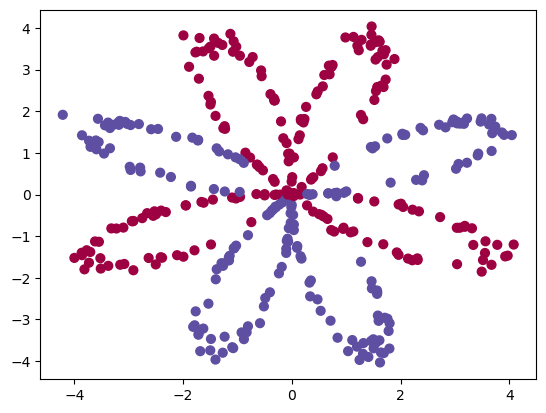

In [20]:
def fix_seeds():
    random_seed = 1      # or coluld be any of your favorite number 
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)

fix_seeds()
# Copy the code from Section Model definition and optimization and modify accordingly
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
# for param in linear1.parameters():  
#     param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## **Debugging Strategy 4:** Use Tensorboard or similar.

At this point the model and training code should be correct and you should be able to train the model. However, the hyperparameters may still not be optimal. For hyperparameter tuning and to log many experiments it is advisable to use some way to visualise the training process. Tensorboard provides such ability. Another alternative is Weights & Biases.  

Let’s now try using TensorBoard with PyTorch! Before logging anything, we need to create a SummaryWriter instance. Writer will output to ./runs/ directory by default.

In [21]:
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

We can use `add_scalar(tag, scalar_value, global_step=None, walltime=None)` to log scalar values (e.g. loss). We have to call `flush()` method to make sure that all pending events have been written to disk. Finally if we do not need the summary writer anymore, then call `close()` method.

Your next task is to slightly modify the code to log the Loss and Accuracy into the Tesnorboard log file. This will require modifying the training loop as follows:

```
for epoch in range(num_epochs):
    running_loss = 0.0
    total_correct = 0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data

        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 

        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        total_correct += output.argmax(dim=1).eq(target).sum().item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()
    
    # Log accuracy and loss
    writer.add_scalar("Loss/train", running_loss, epoch)
    writer.add_scalar("Accuracy", total_correct/ dataset_size, epoch)
        
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))

# Flush and close the log file
writer.flush()
writer.close()
```




Accuracy 0.54 0
epoch[0] = 0.00434706
Accuracy 0.5425 1
Accuracy 0.5525 2
Accuracy 0.535 3
Accuracy 0.535 4
Accuracy 0.5275 5
Accuracy 0.5475 6
Accuracy 0.5125 7
Accuracy 0.54 8
Accuracy 0.57 9
Accuracy 0.59 10
epoch[10] = 0.00420608
Accuracy 0.6 11
Accuracy 0.605 12
Accuracy 0.61 13
Accuracy 0.6175 14
Accuracy 0.62 15
Accuracy 0.625 16
Accuracy 0.63 17
Accuracy 0.605 18
Accuracy 0.59 19
Accuracy 0.61 20
epoch[20] = 0.00404710
Accuracy 0.63 21
Accuracy 0.625 22
Accuracy 0.6275 23
Accuracy 0.63 24
Accuracy 0.6275 25
Accuracy 0.605 26
Accuracy 0.6375 27
Accuracy 0.6375 28
Accuracy 0.6425 29
Accuracy 0.6375 30
epoch[30] = 0.00382867
Accuracy 0.64 31
Accuracy 0.65 32
Accuracy 0.64 33
Accuracy 0.64 34
Accuracy 0.63 35
Accuracy 0.6475 36
Accuracy 0.645 37
Accuracy 0.665 38
Accuracy 0.6575 39
Accuracy 0.665 40
epoch[40] = 0.00359718
Accuracy 0.71 41
Accuracy 0.71 42
Accuracy 0.755 43
Accuracy 0.7575 44
Accuracy 0.7625 45
Accuracy 0.7975 46
Accuracy 0.7925 47
Accuracy 0.7925 48
Accuracy 0.8175

'\nthe assignment is done in this cell, cells after this are some exepi \n'

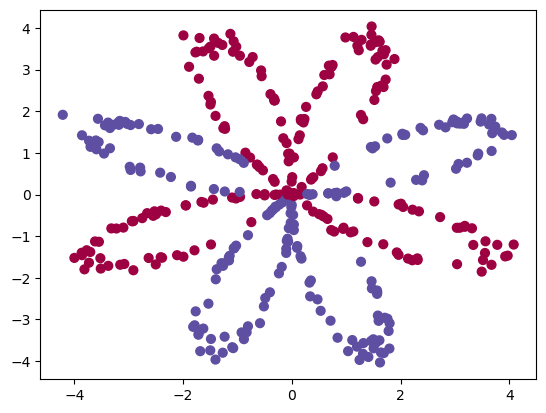

In [22]:
# Insert your code here
def fix_seeds():
    random_seed = 2      # or coluld be any of your favorite number 
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)


def my_fix_seeds(seed):
    random_seed = seed      # or coluld be any of your favorite number 
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)


fix_seeds()
# Copy the code from Section Model definition and optimization and modify accordingly
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
# for param in linear1.parameters():  
#     param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total_correct = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        
        loss = MSELoss(output,target)
        running_loss += loss.item()
        # Backpropagation
        loss.backward()
        optimizer.step()
        output[output>0.5] = 1
        output[output<=0.5] = 0
        total_correct += output.eq(target).sum().item()
    writer.add_scalar("Loss/train", running_loss, epoch)
    writer.add_scalar("Accuracy", total_correct/ dataset_size, epoch)
    print("Accuracy", total_correct/ dataset_size, epoch)
    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))
writer.flush()
writer.close()

%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);
"""
the assignment is done in this cell, cells after this are some exepi 
"""

In [23]:
def my_fix_seeds(seed):
    random_seed = seed      # or coluld be any of your favorite number 
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)


for seed in range(10):
# Copy the code from Section Model definition and optimization and modify accordingly
    hidden_state_size = 5; 
    my_fix_seeds(seed)
    # Define a model and loss 
    linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
    # for param in linear1.parameters():  
    #     param.requires_grad = False
    sigmoid = nn.Sigmoid()
    linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
    model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

    # Define a loss 
    MSELoss = nn.MSELoss()

    # Set hyperparameters
    learning_rate = 0.1
    num_epochs = 301
    batchsize = 64

    # Setup the optimizer 
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    # Seup the dataset and dataloaders (one for training and one for testing)
    planarDataObj = PlanarDataset()
    dataset_size = planarDataObj.__len__()
    train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
    test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

    # Training loop
    for epoch in range(num_epochs):
        running_loss = 0.0
        total_correct = 0.0
        for iter, data in enumerate(train_loader):
            # Get data for the minibatch
            input,target = data
            # We have to set gradients to zero at the start of every iteration
            optimizer.zero_grad() 
            
            # Forward pass through the model
            output = model(input)
            
            loss = MSELoss(output,target)
            running_loss += loss.item()
            # Backpropagation
            loss.backward()
            optimizer.step()
            output[output>0.5] = 1
            output[output<=0.5] = 0
            total_correct += output.eq(target).sum().item()
        # Print the loss per epoch    
        if epoch % 100 == 0: print("seed",seed,"Accuracy", total_correct/ dataset_size, "epoch:",epoch)
    print("====================================")




seed 0 Accuracy 0.5225 epoch: 0
seed 0 Accuracy 0.8525 epoch: 100
seed 0 Accuracy 0.875 epoch: 200
seed 0 Accuracy 0.885 epoch: 300
seed 1 Accuracy 0.43 epoch: 0
seed 1 Accuracy 0.85 epoch: 100
seed 1 Accuracy 0.8775 epoch: 200
seed 1 Accuracy 0.88 epoch: 300
seed 2 Accuracy 0.54 epoch: 0
seed 2 Accuracy 0.865 epoch: 100
seed 2 Accuracy 0.8825 epoch: 200
seed 2 Accuracy 0.885 epoch: 300
seed 3 Accuracy 0.5 epoch: 0
seed 3 Accuracy 0.86 epoch: 100
seed 3 Accuracy 0.8725 epoch: 200
seed 3 Accuracy 0.8825 epoch: 300
seed 4 Accuracy 0.5075 epoch: 0
seed 4 Accuracy 0.87 epoch: 100
seed 4 Accuracy 0.875 epoch: 200
seed 4 Accuracy 0.8825 epoch: 300
seed 5 Accuracy 0.5 epoch: 0
seed 5 Accuracy 0.865 epoch: 100
seed 5 Accuracy 0.875 epoch: 200
seed 5 Accuracy 0.87 epoch: 300
seed 6 Accuracy 0.5125 epoch: 0
seed 6 Accuracy 0.8525 epoch: 100
seed 6 Accuracy 0.8725 epoch: 200
seed 6 Accuracy 0.8825 epoch: 300
seed 7 Accuracy 0.4925 epoch: 0
seed 7 Accuracy 0.855 epoch: 100
seed 7 Accuracy 0.8825 e

In [24]:
# Insert your code here
fix_seeds()
# Copy the code from Section Model definition and optimization and modify accordingly
acc = []
for seed in range(10):
    my_fix_seeds(seed=seed)
    hidden_state_size = 5; 

    # Define a model and loss 
    linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
    # for param in linear1.parameters():  
    #     param.requires_grad = False
    sigmoid = nn.Sigmoid()
    linear2 = nn.Linear(in_features=hidden_state_size, out_features=2) 
    model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

    # Define a loss 
    MSELoss = nn.CrossEntropyLoss()

    # Set hyperparameters
    learning_rate = 0.1
    num_epochs = 301
    batchsize = 64

    # Setup the optimizer 
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    # Seup the dataset and dataloaders (one for training and one for testing)
    import torch.utils.data as data


    planarDataObj = PlanarDataset()
    dataset_size = planarDataObj.__len__()
    train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
    test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

    # Training loop
    for epoch in range(num_epochs):
        running_loss = 0.0
        total_correct = 0.0
        for iter, data in enumerate(train_loader):
            # Get data for the minibatch
            input,target = data
            new_tar = []
            for i in range(target.size(0)):
                
                if target[i] == 0.0:
                    new_tar.append([1.0,0.0])
                else:
                    new_tar.append([0.0,1.0])
            # We have to set gradients to zero at the start of every iteration
            optimizer.zero_grad() 
            
            # Forward pass through the model
            output = model(input)
            new_tar = torch.tensor(new_tar)
            loss = MSELoss(output,new_tar)
            running_loss += loss.item()
            # Backpropagation
            loss.backward()
            optimizer.step()
            total_correct += output.argmax(axis=1).eq(new_tar.argmax(axis=1)).sum().item()
        
        # writer.add_scalar("Loss/train", running_loss, epoch)
        # writer.add_scalar("Accuracy", total_correct/ dataset_size, epoch)
        # Print the loss per epoch    
        if epoch % 40 == 0: print("seed",seed,"Accuracy", total_correct/ dataset_size, "epoch:",epoch)
    print("====================================")
# writer.flush()
# writer.close()



seed 0 Accuracy 0.5 epoch: 0
seed 0 Accuracy 0.545 epoch: 40
seed 0 Accuracy 0.7525 epoch: 80
seed 0 Accuracy 0.85 epoch: 120
seed 0 Accuracy 0.8725 epoch: 160
seed 0 Accuracy 0.8775 epoch: 200
seed 0 Accuracy 0.885 epoch: 240
seed 0 Accuracy 0.885 epoch: 280
seed 1 Accuracy 0.5 epoch: 0
seed 1 Accuracy 0.66 epoch: 40
seed 1 Accuracy 0.6675 epoch: 80
seed 1 Accuracy 0.6625 epoch: 120
seed 1 Accuracy 0.6675 epoch: 160
seed 1 Accuracy 0.6675 epoch: 200
seed 1 Accuracy 0.8125 epoch: 240
seed 1 Accuracy 0.8575 epoch: 280
seed 2 Accuracy 0.5 epoch: 0
seed 2 Accuracy 0.5275 epoch: 40
seed 2 Accuracy 0.64 epoch: 80
seed 2 Accuracy 0.61 epoch: 120
seed 2 Accuracy 0.6425 epoch: 160
seed 2 Accuracy 0.625 epoch: 200
seed 2 Accuracy 0.6225 epoch: 240
seed 2 Accuracy 0.6475 epoch: 280
seed 3 Accuracy 0.51 epoch: 0
seed 3 Accuracy 0.605 epoch: 40
seed 3 Accuracy 0.5225 epoch: 80
seed 3 Accuracy 0.59 epoch: 120
seed 3 Accuracy 0.7875 epoch: 160
seed 3 Accuracy 0.8525 epoch: 200
seed 3 Accuracy 0.865 

In [25]:
# Insert your code here
fix_seeds()
# Copy the code from Section Model definition and optimization and modify accordingly
acc = []
for seed in [2,7]:
    my_fix_seeds(seed=seed)
    hidden_state_size = 5; 

    # Define a model and loss 
    linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
    # for param in linear1.parameters():  
    #     param.requires_grad = False
    sigmoid = nn.Sigmoid()
    linear2 = nn.Linear(in_features=hidden_state_size, out_features=2) 
    model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

    # Define a loss 
    MSELoss = nn.CrossEntropyLoss()

    # Set hyperparameters
    learning_rate = 0.1
    num_epochs = 1000
    batchsize = 64

    # Setup the optimizer 
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    # Seup the dataset and dataloaders (one for training and one for testing)
    import torch.utils.data as data


    planarDataObj = PlanarDataset()
    dataset_size = planarDataObj.__len__()
    train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
    test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

    # Training loop
    for epoch in range(num_epochs):
        running_loss = 0.0
        total_correct = 0.0
        for iter, data in enumerate(train_loader):
            # Get data for the minibatch
            input,target = data
            new_tar = []
            for i in range(target.size(0)):
                
                if target[i] == 0.0:
                    new_tar.append([1.0,0.0])
                else:
                    new_tar.append([0.0,1.0])
            # We have to set gradients to zero at the start of every iteration
            optimizer.zero_grad() 
            
            # Forward pass through the model
            output = model(input)
            new_tar = torch.tensor(new_tar)
            loss = MSELoss(output,new_tar)
            running_loss += loss.item()
            # Backpropagation
            loss.backward()
            optimizer.step()
            total_correct += output.argmax(axis=1).eq(new_tar.argmax(axis=1)).sum().item()
        
        # writer.add_scalar("Loss/train", running_loss, epoch)
        # writer.add_scalar("Accuracy", total_correct/ dataset_size, epoch)
        # Print the loss per epoch    
        if epoch % 40 == 0: print("seed",seed,"Accuracy", total_correct/ dataset_size, "epoch:",epoch)
    print("====================================")
# writer.flush()
# writer.close()



seed 2 Accuracy 0.5 epoch: 0
seed 2 Accuracy 0.5275 epoch: 40
seed 2 Accuracy 0.64 epoch: 80
seed 2 Accuracy 0.61 epoch: 120
seed 2 Accuracy 0.6425 epoch: 160
seed 2 Accuracy 0.625 epoch: 200
seed 2 Accuracy 0.6225 epoch: 240
seed 2 Accuracy 0.6475 epoch: 280
seed 2 Accuracy 0.6475 epoch: 320
seed 2 Accuracy 0.655 epoch: 360
seed 2 Accuracy 0.655 epoch: 400
seed 2 Accuracy 0.6525 epoch: 440
seed 2 Accuracy 0.6575 epoch: 480
seed 2 Accuracy 0.655 epoch: 520
seed 2 Accuracy 0.66 epoch: 560
seed 2 Accuracy 0.6575 epoch: 600
seed 2 Accuracy 0.6575 epoch: 640
seed 2 Accuracy 0.6575 epoch: 680
seed 2 Accuracy 0.66 epoch: 720
seed 2 Accuracy 0.66 epoch: 760
seed 2 Accuracy 0.66 epoch: 800
seed 2 Accuracy 0.6625 epoch: 840
seed 2 Accuracy 0.6625 epoch: 880
seed 2 Accuracy 0.665 epoch: 920
seed 2 Accuracy 0.6625 epoch: 960
seed 7 Accuracy 0.5 epoch: 0
seed 7 Accuracy 0.63 epoch: 40
seed 7 Accuracy 0.625 epoch: 80
seed 7 Accuracy 0.63 epoch: 120
seed 7 Accuracy 0.6375 epoch: 160
seed 7 Accuracy 

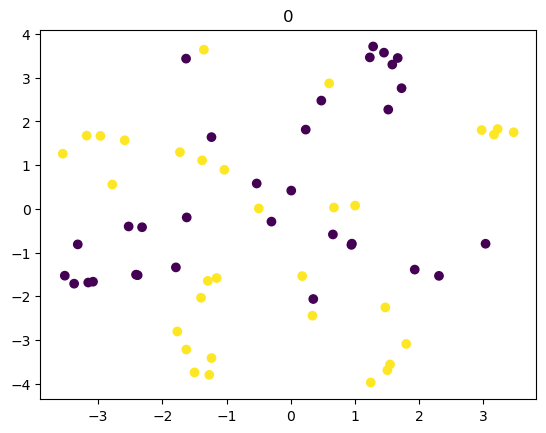

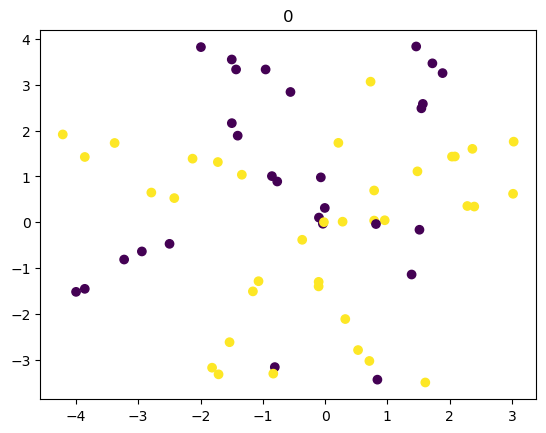

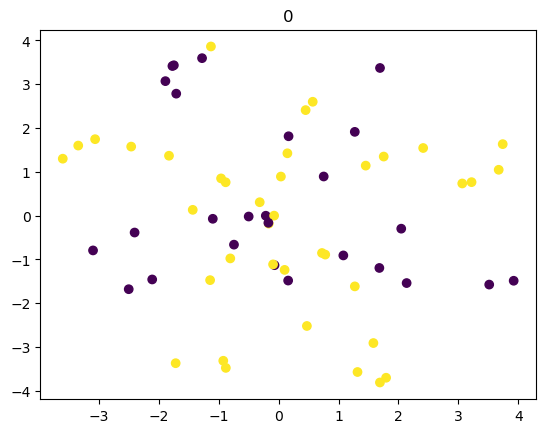

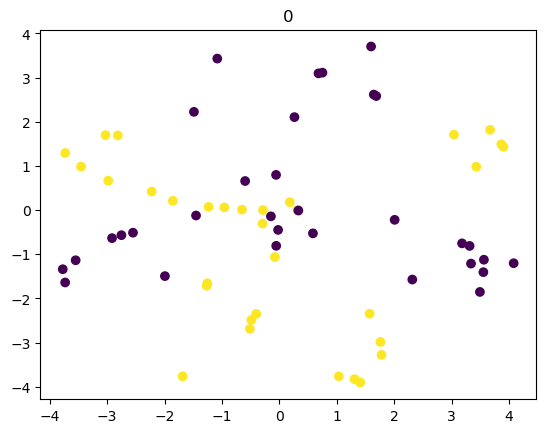

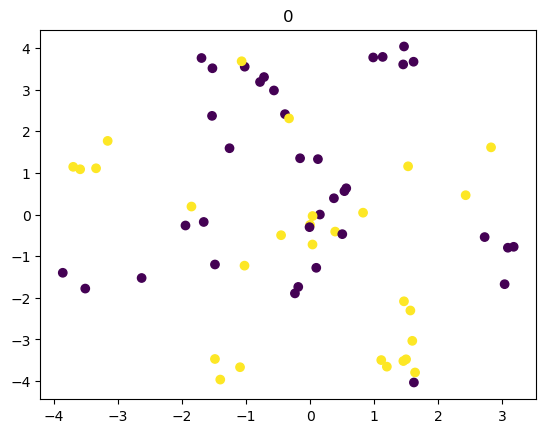

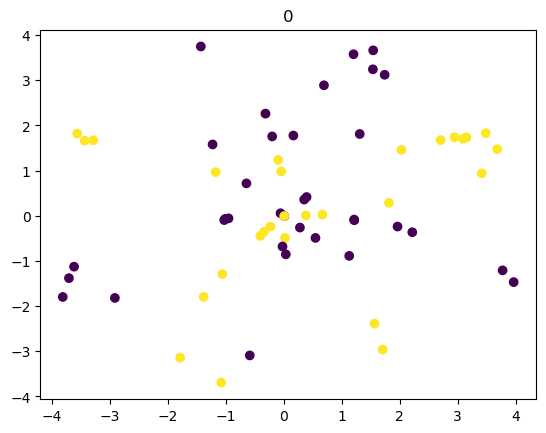

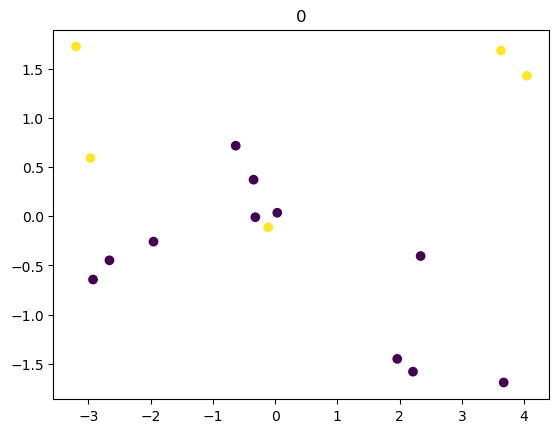

seed 2 Accuracy 0.5 epoch: 0


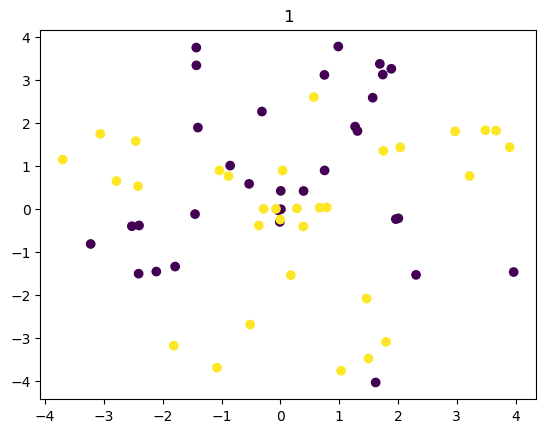

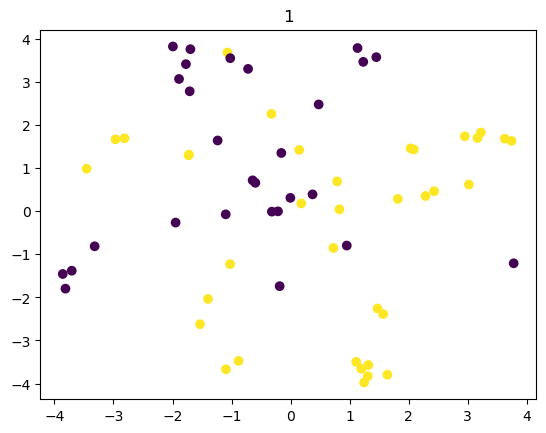

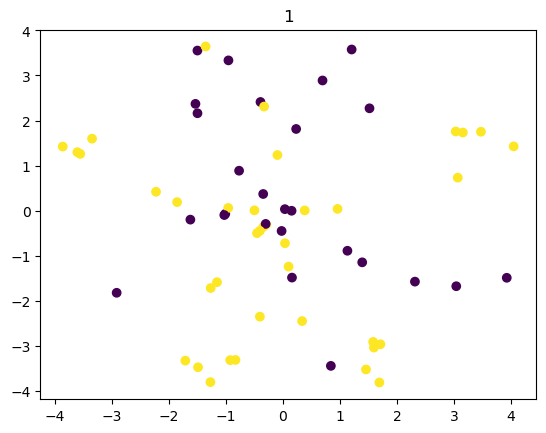

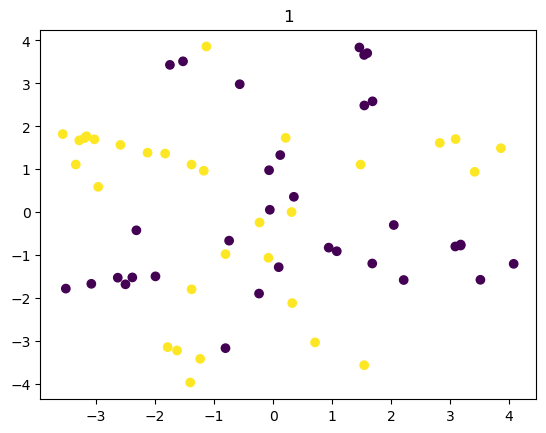

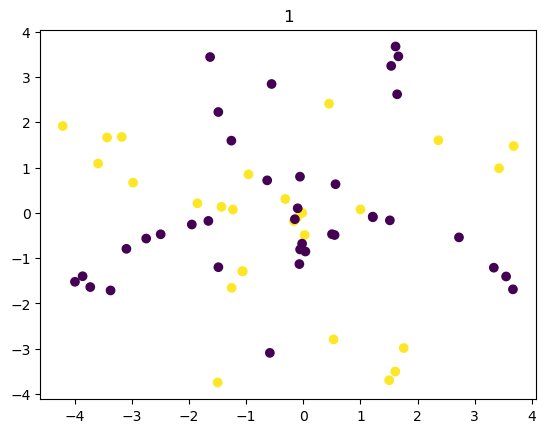

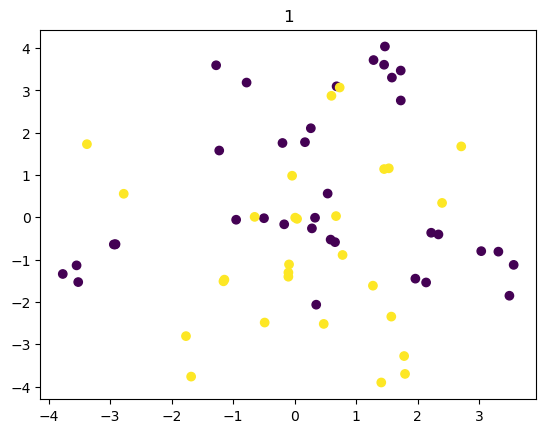

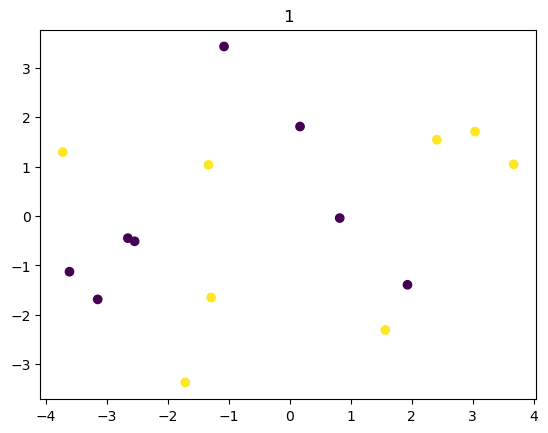

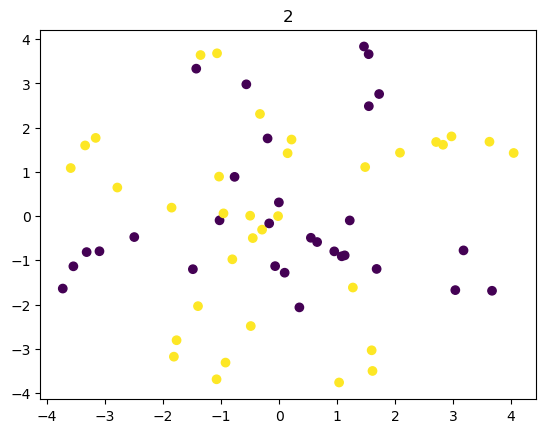

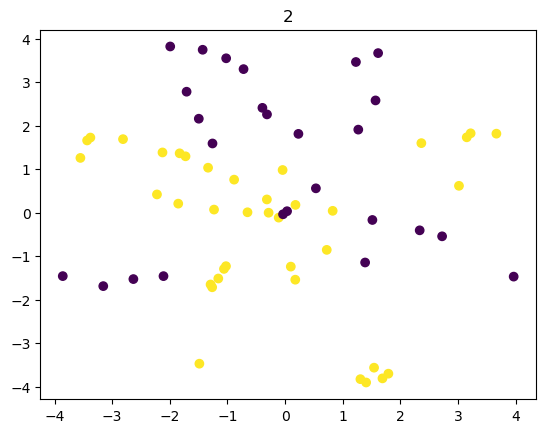

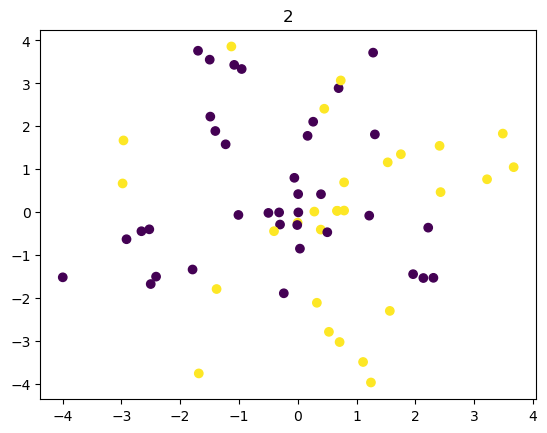

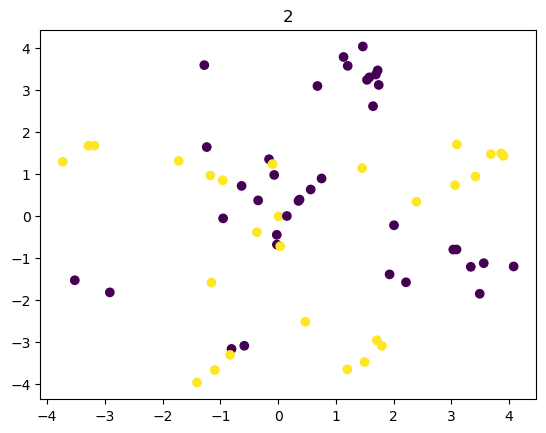

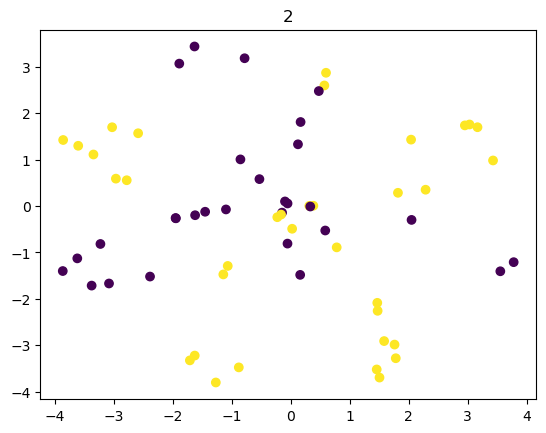

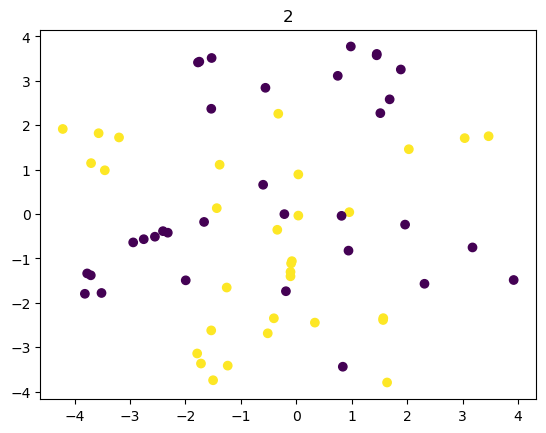

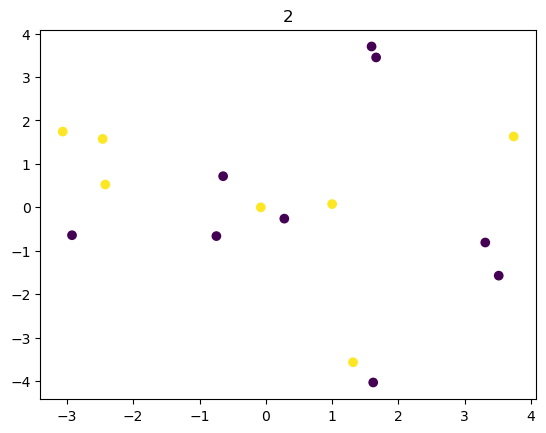

In [26]:
# Insert your code here
fix_seeds()
# Copy the code from Section Model definition and optimization and modify accordingly
acc = []
for seed in [2]:
    my_fix_seeds(seed=seed)
    hidden_state_size = 5; 

    # Define a model and loss 
    linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
    # for param in linear1.parameters():  
    #     param.requires_grad = False
    sigmoid = nn.Sigmoid()
    linear2 = nn.Linear(in_features=hidden_state_size, out_features=2) 
    model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

    # Define a loss 
    MSELoss = nn.CrossEntropyLoss()

    # Set hyperparameters
    learning_rate = 0.1
    num_epochs = 3
    batchsize = 64

    # Setup the optimizer 
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    # Seup the dataset and dataloaders (one for training and one for testing)
    import torch.utils.data as data


    planarDataObj = PlanarDataset()
    dataset_size = planarDataObj.__len__()
    train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
    test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

    # Training loop
    for epoch in range(num_epochs):
        running_loss = 0.0
        total_correct = 0.0
        for iter, data in enumerate(train_loader):
            # Get data for the minibatch
            input,target = data
            plt.scatter(input[:,0],input[:,1],c=target)
            plt.title(str(epoch))
            plt.show()
            new_tar = []
            for i in range(target.size(0)):
                
                if target[i] == 0.0:
                    new_tar.append([1.0,0.0])
                else:
                    new_tar.append([0.0,1.0])
            # We have to set gradients to zero at the start of every iteration
            optimizer.zero_grad() 
            
            # Forward pass through the model
            output = model(input)
            new_tar = torch.tensor(new_tar)
            loss = MSELoss(output,new_tar)
            running_loss += loss.item()
            # Backpropagation
            loss.backward()
            optimizer.step()
            total_correct += output.argmax(axis=1).eq(new_tar.argmax(axis=1)).sum().item()
           
        if epoch % 40 == 0: print("seed",seed,"Accuracy", total_correct/ dataset_size, "epoch:",epoch)
    print("====================================")




Now install the tensorboard

In [27]:
%pip install tensorboard

Now to start tensorboard in google colab we can run following command.

In [28]:
%load_ext tensorboard
%tensorboard --logdir runs